## REDES NEURONALES ARTIFICIALES


##Carga de datos
---

Montando archivos:

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Mostrando lista de archivos:

In [4]:
%%bash
ls -l /content/drive/My\ Drive/MCD/IA/datasets

total 669
-rw------- 1 root root 684869 Jun  5 15:57 clientes_data.csv


##Funciones necesarias
---

In [5]:
# Funciones

import numpy as np

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.externals import joblib

import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred,
                          normalize=False,
                          title=None):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Matriz de Confusión Normalizada'
        else:
            title = 'Matriz de Confusión sin Normalizar'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = unique_labels(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matriz de Confusión Normalizada")
    else:
        print('Matriz de Confusión sin Normalizar')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.grid(linewidth=.0)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.show()
    return ax

def saveFile(object_to_save, scaler_filename):
    joblib.dump(object_to_save, scaler_filename)

def loadFile(scaler_filename):
    return joblib.load(scaler_filename)

def plotHistogram(dataset_final):
    dataset_final.hist(figsize=(20,14), edgecolor="black", bins=20)
    plt.show()

def plotCorrelations(dataset_final):
    fig, ax = plt.subplots(figsize=(10,8))   # size in inches
    g = sns.heatmap(dataset_final.corr(), annot=True, cmap="YlGnBu", ax=ax)
    g.set_yticklabels(g.get_yticklabels(), rotation = 0)
    g.set_xticklabels(g.get_xticklabels(), rotation = 45)
    fig.tight_layout()
    plt.show()


/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)



 ## PARTE I - PREPROCESAMIENTO DE DATOS
---


In [6]:
# Importando librerías
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Importando Datasets
dataset_csv = pd.read_csv('/content/drive/My Drive/MCD/IA/datasets/clientes_data.csv')

# Describir la data original
print ("\nDataset original:\n", dataset_csv.describe(include='all'))

# Dataset reducido
dataset = dataset_csv.iloc[:,3:14]
dataset_columns = dataset.columns
dataset_values = dataset.values

# Describir la data truncada
print ("\nDataset reducido: \n", dataset.describe(include='all'))
print("\n",dataset.head())


Dataset original:
          NumeroFila           DNI  ... SalarioEstimado      Abandono
count   10000.00000  1.000000e+04  ...    10000.000000  10000.000000
unique          NaN           NaN  ...             NaN           NaN
top             NaN           NaN  ...             NaN           NaN
freq            NaN           NaN  ...             NaN           NaN
mean     5000.50000  1.569094e+07  ...   100090.239881      0.203700
std      2886.89568  7.193619e+04  ...    57510.492818      0.402769
min         1.00000  1.556570e+07  ...       11.580000      0.000000
25%      2500.75000  1.562853e+07  ...    51002.110000      0.000000
50%      5000.50000  1.569074e+07  ...   100193.915000      0.000000
75%      7500.25000  1.575323e+07  ...   149388.247500      0.000000
max     10000.00000  1.581569e+07  ...   199992.480000      1.000000

[11 rows x 14 columns]

Dataset reducido: 
         ScoreCrediticio    Pais  ... SalarioEstimado      Abandono
count      10000.000000   10000  ...    

Codificando datos categóricos:


In [7]:
#Codificando datos categóricos:
labelEncoder_X_1 = LabelEncoder()
dataset_values[:, 1] = labelEncoder_X_1.fit_transform(dataset_values[:, 1])
labelEncoder_X_2 = LabelEncoder()
dataset_values[:, 2] = labelEncoder_X_2.fit_transform(dataset_values[:, 2])
print ("\nDataset Categorizado: \n", dataset_values)


Dataset Categorizado: 
 [[619 0 0 ... 1 101348.88 1]
 [608 2 0 ... 1 112542.58 0]
 [502 0 0 ... 0 113931.57 1]
 ...
 [709 0 0 ... 1 42085.58 1]
 [772 1 1 ... 0 92888.52 1]
 [792 0 0 ... 0 38190.78 0]]



Escalamiento/Normalización de Features (StandardScaler: (x-u)/s)

In [8]:

# Escalamiento/Normalización de Features (StandardScaler: (x-u)/s)
stdScaler = StandardScaler()
dataset_values[:,0:10] = stdScaler.fit_transform(dataset_values[:,0:10])


# Dataset final normalizado
dataset_final = pd.DataFrame(dataset_values,columns=dataset_columns, dtype=np.float64)
print ("\nDataset Final:")
print(dataset_final.describe(include='all'))
print("\n", dataset_final.head())


Dataset Final:
       ScoreCrediticio          Pais  ...  SalarioEstimado      Abandono
count     1.000000e+04  1.000000e+04  ...     1.000000e+04  10000.000000
mean     -4.870326e-16  5.266676e-16  ...    -1.580958e-17      0.203700
std       1.000050e+00  1.000050e+00  ...     1.000050e+00      0.402769
min      -3.109504e+00 -9.018862e-01  ...    -1.740268e+00      0.000000
25%      -6.883586e-01 -9.018862e-01  ...    -8.535935e-01      0.000000
50%       1.522218e-02 -9.018862e-01  ...     1.802807e-03      0.000000
75%       6.981094e-01  3.065906e-01  ...     8.572431e-01      0.000000
max       2.063884e+00  1.515067e+00  ...     1.737200e+00      1.000000

[8 rows x 11 columns]

    ScoreCrediticio      Pais  ...  SalarioEstimado  Abandono
0        -0.326221 -0.901886  ...         0.021886       1.0
1        -0.440036  1.515067  ...         0.216534       0.0
2        -1.536794 -0.901886  ...         0.240687       1.0
3         0.501521 -0.901886  ...        -0.108918       0

Graficando datos:


 Histogramas:


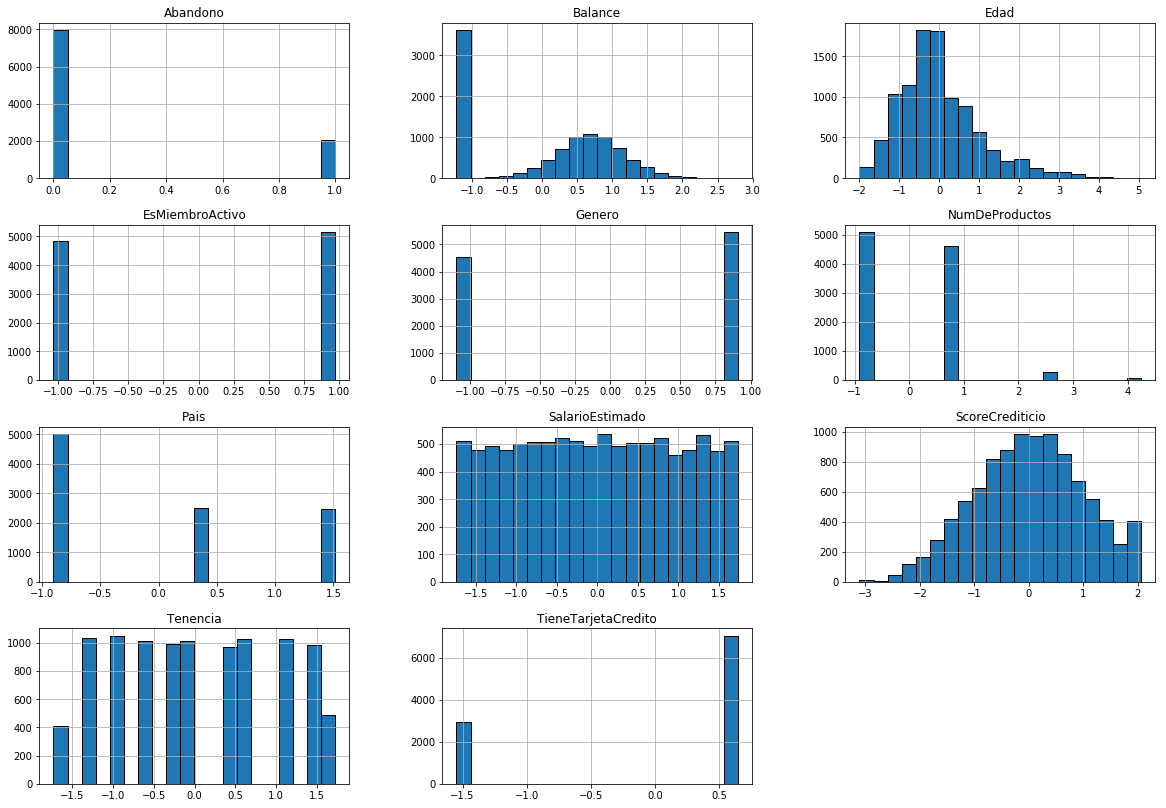


 Correlaciones:


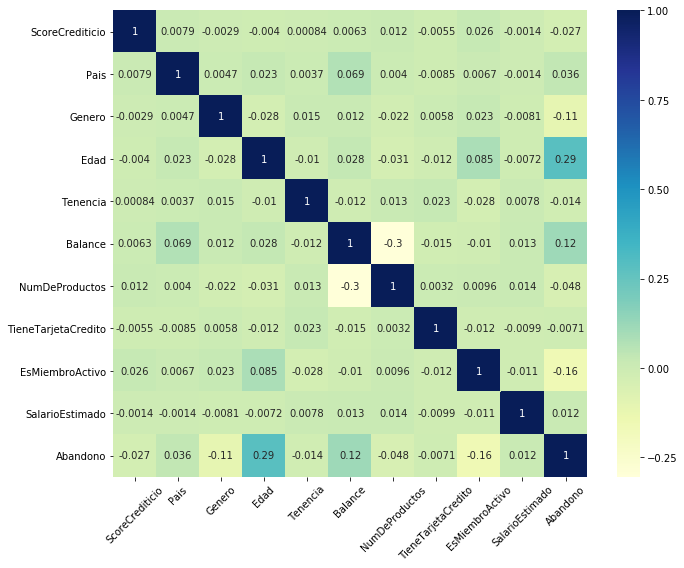

In [9]:
# Distribuciones de la data y Correlaciones
print("\n Histogramas:")
plotHistogram(dataset_final)

print("\n Correlaciones:")
plotCorrelations(dataset_final)

# Obteniendo valores a procesar
X = dataset_final.iloc[:, 0:10].values
y = dataset_final.iloc[:, 10].values

# Dividiendo el Dataset en sets de Training y Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

---
## PARTE II - CONSTRUYENDO LA RED NEURONAL ARTIFICIAL
---

In [10]:
# Importando Keras y Tensorflow
from keras.models import Sequential
from keras.layers import Dense
from keras.initializers import RandomUniform

# Inicializando la Red Neuronal
neural_network = Sequential()

# kernel_initializer Define la forma como se asignará los Pesos iniciales Wi
initial_weights = RandomUniform(minval = -0.5, maxval = 0.5)

# Agregado la Capa de entrada y la primera capa oculta
# 10 Neuronas en la capa de entrada y 8 Neuronas en la primera capa oculta
neural_network.add(Dense(units = 8, kernel_initializer = initial_weights, activation = 'relu', input_dim = 10))

# Agregando capa oculta
neural_network.add(Dense(units = 5, kernel_initializer = initial_weights, activation = 'relu'))

# Agregando capa oculta
neural_network.add(Dense(units = 4, kernel_initializer = initial_weights, activation = 'relu'))

# Agregando capa de salida
neural_network.add(Dense(units = 1, kernel_initializer = initial_weights, activation = 'sigmoid'))

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


Arquitectura de la Red Neuronal Artificial:

In [11]:
# Imprimir Arquitectura de la Red
neural_network.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 45        
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 24        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 5         
Total params: 162
Trainable params: 162
Non-trainable params: 0
_________________________________________________________________


Entrenamiento:

In [12]:
# Compilando la Red Neuronal
# optimizer: Algoritmo de optimización | binary_crossentropy = 2 Classes
# loss: error
neural_network.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


# Entrenamiento
neural_network.fit(X_train, y_train, batch_size = 32, epochs = 100)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
8000/8000 [==============================] - 4s 486us/step - loss: 0.5429 - acc: 0.7856
Epoch 2/100
8000/8000 [==============================] - 1s 113us/step - loss: 0.4622 - acc: 0.7960
Epoch 3/100
8000/8000 [==============================] - 1s 110us/step - loss: 0.4418 - acc: 0.7960
Epoch 4/100
8000/8000 [==============================] - 1s 113us/step - loss: 0.4316 - acc: 0.7975
Epoch 5/100
8000/8000 [==============================] - 1s 114us/step - loss: 0.4242 - acc: 0.8154
Epoch 6/100
8000/8000 [==============================] - 1s 111us/step - loss: 0.4170 - acc: 0.8209
Epoch 7/100
8000/8000 [==============================] - 1s 113us/step - loss: 0.4103 - acc: 0.8275
Epoch 8/100
8000/8000 [==============================] - 1s 113us/step - loss: 0.4043 - acc: 0.8301
Epoch 9/100
8000/8000 [==============================] - 1s 112us/step - loss: 0.3979 - acc: 0.8340
Epoch 10/100
8000/8000 [============================

---
## PARTE III - PPREDICCIONES Y EVALUACIONES DE LA RED
---

In [13]:
# Haciendo predicción de los resultados del Test
y_pred = neural_network.predict(X_test)
y_pred_norm = (y_pred > 0.5)

y_pred_norm = y_pred_norm.astype(int)
y_test = y_test.astype(int)

# 50 primeros resultados a comparar
print("\nPredicciones (50 primeros):")
print("\n\tReal", "\t", "Predicción(N)","\t", "Predicción(O)")
for i in range(50):
    print(i, '\t', y_test[i], '\t ', y_pred_norm[i], '\t \t', y_pred[i])


Predicciones (50 primeros):

	Real 	 Predicción(N) 	 Predicción(O)
0 	 0 	  [0] 	 	 [0.29063135]
1 	 1 	  [0] 	 	 [0.35678935]
2 	 0 	  [0] 	 	 [0.17335743]
3 	 0 	  [0] 	 	 [0.06806651]
4 	 0 	  [0] 	 	 [0.21013346]
5 	 1 	  [1] 	 	 [0.8853586]
6 	 0 	  [0] 	 	 [0.0735437]
7 	 0 	  [0] 	 	 [0.08894065]
8 	 1 	  [0] 	 	 [0.3178451]
9 	 1 	  [1] 	 	 [0.93258554]
10 	 0 	  [0] 	 	 [0.04270181]
11 	 0 	  [0] 	 	 [0.39812407]
12 	 0 	  [0] 	 	 [0.2705837]
13 	 0 	  [0] 	 	 [0.313697]
14 	 1 	  [1] 	 	 [0.6040976]
15 	 1 	  [1] 	 	 [0.52662635]
16 	 0 	  [0] 	 	 [0.14737475]
17 	 0 	  [0] 	 	 [0.11478081]
18 	 0 	  [0] 	 	 [0.09154394]
19 	 0 	  [0] 	 	 [0.07783148]
20 	 0 	  [1] 	 	 [0.5982429]
21 	 0 	  [0] 	 	 [0.01065233]
22 	 0 	  [0] 	 	 [0.04699698]
23 	 0 	  [0] 	 	 [0.11409542]
24 	 0 	  [0] 	 	 [0.0074915]
25 	 0 	  [0] 	 	 [0.0897451]
26 	 0 	  [0] 	 	 [0.09712094]
27 	 0 	  [0] 	 	 [0.04840377]
28 	 0 	  [0] 	 	 [0.16358072]
29 	 0 	  [0] 	 	 [0.46499935]
30 	 0 	  [0] 	 	 [0.0

Aplicando la Matriz de Confusión:

In [14]:
# Aplicando la Matriz de Confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_norm)
print ("\nMatriz de Confusión: \n", cm)


Matriz de Confusión: 
 [[1486  109]
 [ 180  225]]


Graficando la Matriz de Confusión:

Matriz de Confusión sin Normalizar
[[1486  109]
 [ 180  225]]


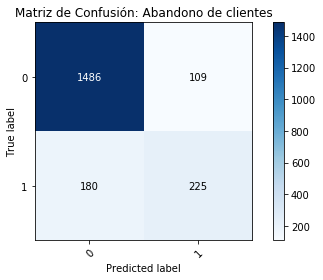

In [15]:
plot_confusion_matrix(y_test, y_pred_norm, normalize=False,title="Matriz de Confusión: Abandono de clientes")